# Seçil Köktürk's Solution for TEB Credit Scoring Case Study 

## Introduction

This Jupyter Notebook contains the solution of the case study, prepared by Secil Kokturk as part of the employment process at TEB.
The code is run on Python 3.

In [815]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix


# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 60
pd.set_option('display.max_columns', 300)

### Data Analysis

In [816]:
if __name__ == '__main__':
   
    # reading data
    data = pd.read_excel('credit_scoring_case_study_data 102018.xls', sheet_name='credit_scoring_case_study_data ', header=0, index_col=0 )

In [817]:
    #shape of data
    print(data.shape)

(5626, 51)


In [818]:
    #check columns
    print("Column names of dataset: \n{}".format(data.keys()))

Column names of dataset: 
Index(['VAR_TARGET', 'VAR_1', 'VAR_2', 'VAR_3', 'VAR_4', 'VAR_5', 'VAR_6',
       'VAR_7', 'VAR_8', 'VAR_9', 'VAR_10', 'VAR_11', 'VAR_12', 'VAR_13',
       'VAR_14', 'VAR_15', 'VAR_16', 'VAR_17', 'VAR_18', 'VAR_19', 'VAR_20',
       'VAR_21', 'VAR_22', 'VAR_23', 'VAR_24', 'VAR_25', 'VAR_26', 'VAR_27',
       'VAR_28', 'VAR_29', 'VAR_30', 'VAR_31', 'VAR_32', 'VAR_33', 'VAR_34',
       'VAR_35', 'VAR_36', 'VAR_37', 'VAR_38', 'VAR_39', 'VAR_40', 'VAR_41',
       'VAR_42', 'VAR_43', 'VAR_44', 'VAR_45', 'VAR_46', 'VAR_47', 'VAR_48',
       'VAR_49', 'VAR_50'],
      dtype='object')


In [819]:
    #display data sample
    display(data.tail(10))

,VAR_TARGET,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,VAR_11,VAR_12,VAR_13,VAR_14,VAR_15,VAR_16,VAR_17,VAR_18,VAR_19,VAR_20,VAR_21,VAR_22,VAR_23,VAR_24,VAR_25,VAR_26,VAR_27,VAR_28,VAR_29,VAR_30,VAR_31,VAR_32,VAR_33,VAR_34,VAR_35,VAR_36,VAR_37,VAR_38,VAR_39,VAR_40,VAR_41,VAR_42,VAR_43,VAR_44,VAR_45,VAR_46,VAR_47,VAR_48,VAR_49,VAR_50
KEY,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5617,0,5207,Q,34.0,7500.0,7500.0,0.0,11200.0,1274.0,35.0,0.0,11.0,5,3700.0,3700.0,2000.0,E,35.0,1453.0,1.0,3.0,11.0,U,E,3100,3100,NaN,0,0,3200.0,6.0,16.0,8.0,A,3200,1.0,Y,S,900.0,0,NaN,5.0,4.0,NaN,5600.0,3700.0,3243.0,3.0,3316.0,3100,3100.0
5618,0,2908,W,34.0,8400.0,900.0,0.0,11900.0,3483.0,1350.0,1223.0,14.0,9,0.0,0.0,NaN,E,34.0,853.0,1.0,3.0,1.0,Y,B,10000,10000,0.0,0,1,3250.0,3153.0,7.0,NaN,NaN,10000,3.0,N,B,1101.0,18,NaN,0.0,0.0,NaN,3967.0,0.0,NaN,0.0,NaN,10000,10000.0
5619,0,2301,I,34.0,NaN,NaN,1.0,1000.0,514.0,153.0,0.0,36.0,10,1000.0,1000.0,NaN,E,9.0,1228.0,0.0,0.0,0.0,L,B,1300,1300,1.0,0,0,0.0,0.0,78.0,NaN,NaN,1500,1.0,Y,S,500.0,4,NaN,332.0,383.0,NaN,1000.0,1000.0,1651.0,227.0,1651.0,1300,1300.0
5620,0,3601,Q,34.0,2000.0,300.0,0.0,3975.0,2393.0,305.0,0.0,14.0,10,1000.0,1000.0,NaN,E,34.0,887.0,0.0,0.0,1.0,L,B,2000,2000,1.0,0,5,1450.0,301.0,16.0,NaN,NaN,5000,1.0,Y,S,713.0,12,NaN,593.0,952.0,NaN,994.0,1000.0,1716.0,797.0,858.0,2000,2000.0
5621,0,2704,Q,35.0,NaN,NaN,3.0,0.0,0.0,0.0,0.0,11.0,10,0.0,0.0,NaN,E,6.0,0.0,1.0,1.0,0.0,O,B,2600,2600,0.0,0,4,0.0,0.0,16.0,NaN,NaN,6000,1.0,Y,S,817.0,3,NaN,23.0,91.0,NaN,0.0,0.0,1563.0,45.0,1552.0,2600,2600.0
5622,0,2209,Q,34.0,NaN,NaN,0.0,1000.0,635.0,106.0,0.0,14.0,10,1000.0,1000.0,NaN,E,34.0,1101.0,0.0,3.0,0.0,U,B,1300,1300,1.0,1,1,0.0,0.0,16.0,NaN,NaN,1000,5.0,Y,S,701.0,11,1717.0,704.0,898.0,NaN,1000.0,1000.0,1301.0,1008.0,905.0,1300,1300.0
5623,0,4304,I,64.0,40000.0,225.0,0.0,142425.0,3329.0,3414.0,0.0,36.0,9,7000.0,7000.0,1000.0,K,64.0,1469.0,0.0,0.0,6.0,U,B,8500,8500,1.0,0,0,3300.0,0.0,41.0,0.0,A,6000,1.0,N,B,NaN,62,NaN,2258.0,952.0,8500.0,17803.0,7000.0,NaN,719.0,NaN,8500,8500.0
5624,0,2704,Q,34.0,NaN,NaN,3.0,3500.0,0.0,0.0,0.0,35.0,10,3500.0,3500.0,NaN,E,77.0,1186.0,0.0,0.0,0.0,L,B,2800,2800,0.0,0,9,0.0,0.0,16.0,NaN,NaN,7500,5.0,N,S,101.0,14,NaN,7.0,7.0,NaN,3500.0,3500.0,NaN,6.0,NaN,2800,2800.0
5625,0,2209,Q,41.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,25.0,10,0.0,0.0,1000.0,E,41.0,1411.0,0.0,1.0,1.0,L,B,2000,2000,0.0,0,4,1000.0,1.0,6.0,0.0,A,15000,1.0,Y,S,806.0,18,NaN,316.0,1633.0,NaN,0.0,0.0,1971.0,1259.0,2101.0,2000,2000.0


In [820]:
    data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5626 entries, 1 to 5626
Data columns (total 51 columns):
VAR_TARGET    5626 non-null int64
VAR_1         5626 non-null int64
VAR_2         5626 non-null object
VAR_3         5622 non-null float64
VAR_4         4344 non-null float64
VAR_5         4344 non-null float64
VAR_6         5612 non-null float64
VAR_7         5612 non-null float64
VAR_8         5612 non-null float64
VAR_9         5612 non-null float64
VAR_10        5612 non-null float64
VAR_11        5316 non-null float64
VAR_12        5626 non-null int64
VAR_13        4528 non-null float64
VAR_14        4528 non-null float64
VAR_15        1801 non-null float64
VAR_16        5598 non-null object
VAR_17        5508 non-null float64
VAR_18        5612 non-null float64
VAR_19        5612 non-null float64
VAR_20        5612 non-null float64
VAR_21        5612 non-null float64
VAR_22        4702 non-null object
VAR_23        5578 non-null object
VAR_24        5626 non-null int64
VAR_2

The variables are investigated using their dtypes above and their metamodel for their meaning, data type such as categorical or numerical, missing values, etc. This information is in the excel file attached within the project.

In [821]:
    #explore categorical variables with sizes
    print ("\r\nTarget\n")
    print(data.VAR_TARGET.value_counts(dropna=False)) # Target
    print ("\r\nApplication Channel\n")
    print(data.VAR_2.value_counts(dropna=False))#Application Channel
    print ("\r\nBranch City Code\n")
    print(data.VAR_3.value_counts(dropna=False))#Branch City Code
    print ("\r\nEmployment Field\n")
    print(data.VAR_11.value_counts(dropna=False))#Employment Field
    print ("\r\nEmployment Type\n")
    print(data.VAR_12.value_counts(dropna=False))#Employment Type
    print ("\r\nGender\n")
    print(data.VAR_16.value_counts(dropna=False))#Gender
    print ("\r\nHome City Code\n")
    print(data.VAR_17.value_counts(dropna=False))#Home City Code
    print ("\r\nLevel of Education\n")
    print(data.VAR_22.value_counts(dropna=False))#Level of Education
    print ("\r\nMarital Status\n")
    print(data.VAR_23.value_counts(dropna=False))#Marital Status
    print ("\r\nOccupation Category\n")
    print(data.VAR_31.value_counts(dropna=False))#Occupation Category
    print ("\r\nOverdraft Status\n")
    print(data.VAR_33.value_counts(dropna=False))#Overdraft Status
    print ("\r\nResidential Status\n")
    print(data.VAR_35.value_counts(dropna=False))#Residential Status
    print ("\r\nSalary Paid by Bank\n")
    print(data.VAR_36.value_counts(dropna=False))#Salary Paid by Bank
    print ("\r\nSocial Security Type\n")
    print(data.VAR_37.value_counts(dropna=False))#Social Security Type



Target

0    5380
1     246
Name: VAR_TARGET, dtype: int64

Application Channel

I    2450
Q    1953
W    1214
S       9
Name: VAR_2, dtype: int64

Branch City Code

 34.0    5142
 35.0      72
 6.0       57
 16.0      34
 41.0      28
 7.0       26
 48.0      23
 31.0      15
 26.0      15
 20.0      13
 1.0       13
 38.0      11
 21.0      11
 33.0      10
 42.0      10
 54.0       8
 10.0       7
 45.0       7
 39.0       6
 17.0       6
 43.0       6
 23.0       5
 22.0       5
 63.0       5
 44.0       4
NaN         4
 59.0       4
 71.0       4
 77.0       4
 46.0       4
 47.0       3
 55.0       3
 9.0        3
 52.0       3
 58.0       3
 3.0        3
 19.0       3
 5.0        3
 25.0       3
 65.0       3
 27.0       3
 40.0       2
 14.0       2
 61.0       2
 74.0       2
 64.0       2
 18.0       2
 32.0       2
 72.0       2
 53.0       2
 81.0       2
 78.0       1
 51.0       1
 76.0       1
 50.0       1
 57.0       1
 68.0       1
 15.0       1
 70.0       1
 2.0   

In [822]:
    #percentage of Good (0) or Bad (1) Credit Performances
    count_good_credit_perf = len(data[data['VAR_TARGET']==0])
    count_bad_credit_perf = len(data[data['VAR_TARGET']==1])
    pct_of_good_credit_perf = count_good_credit_perf/(count_good_credit_perf+count_bad_credit_perf)
    print("percentage of good credit performance is", pct_of_good_credit_perf*100)
    pct_of_bad_credit_perf = count_bad_credit_perf/(count_good_credit_perf+count_bad_credit_perf)
    print("percentage of bad_credit_performance is", pct_of_bad_credit_perf*100)

percentage of good credit performance is 95.62744400995379
percentage of bad_credit_performance is 4.372555990046214


In [823]:
    #explore numerical variables (Nan values excluded from the calculation)
    data[['VAR_1', 'VAR_4', 'VAR_5', 'VAR_6', 'VAR_7', 'VAR_8', 'VAR_9', 'VAR_10', 'VAR_13', 'VAR_14', 'VAR_15', 'VAR_18', 'VAR_19', 'VAR_20', 'VAR_21', 'VAR_24', 'VAR_25', 'VAR_26', 'VAR_27', 'VAR_28', 'VAR_29', 'VAR_30', 'VAR_32', 'VAR_34', 'VAR_38', 'VAR_39', 'VAR_40', 'VAR_41', 'VAR_42', 'VAR_43', 'VAR_44', 'VAR_45', 'VAR_46', 'VAR_47', 'VAR_48', 'VAR_49', 'VAR_50']].describe()

,VAR_1,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,VAR_13,VAR_14,VAR_15,VAR_18,VAR_19,VAR_20,VAR_21,VAR_24,VAR_25,VAR_26,VAR_27,VAR_28,VAR_29,VAR_30,VAR_32,VAR_34,VAR_38,VAR_39,VAR_40,VAR_41,VAR_42,VAR_43,VAR_44,VAR_45,VAR_46,VAR_47,VAR_48,VAR_49,VAR_50
count,5626.000000,4344.000000,4344.000000,5612.000000,5612.000000,5612.000000,5612.000000,5612.000000,4528.000000,4528.000000,1801.000000,5612.000000,5612.000000,5612.000000,5612.000000,5.626000e+03,5.626000e+03,4277.000000,5626.000000,5626.000000,5612.000000,5612.000000,1801.000000,5626.000000,5447.000000,5626.000000,1513.000000,5621.000000,5621.000000,34.000000,5612.000000,4528.000000,1814.000000,5621.000000,2306.000000,5.626000e+03,3362.000000
mean,3257.151973,6513.402164,3401.622238,0.617962,9748.699572,4144.263899,1148.589095,100.529758,2299.436617,2299.436617,1413.297612,1159.089629,1.406985,3.725410,2.402887,5.178056e+03,5.168896e+03,0.482114,0.368823,2.585140,2674.626158,869.975053,546.444198,8054.934589,470.449605,6.789193,11255.184402,2195.338730,2199.308842,3611.764706,4129.482359,2299.436617,2401.598126,2149.124177,1897.083261,6.115745e+03,3508.943783
std,888.997086,7635.750969,4629.699543,1.368544,16482.921883,8517.336280,2160.342345,485.209422,3525.160200,3525.160200,1779.407174,278.393516,2.669072,5.393314,3.392047,6.850894e+04,6.850890e+04,0.503004,0.735112,4.929002,4964.099949,2239.891450,986.268197,5084.109425,442.597967,15.260115,23652.925127,15104.976409,15096.942980,2696.766561,4737.091335,3525.160200,2180.234920,15469.080255,1818.558706,8.491456e+04,6886.322041
min,1800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1300.000000,0.000000,0.000000,25.000000,0.000000,0.000000,0.000000e+00,500.000000
25%,2606.000000,2000.000000,800.000000,0.000000,2000.000000,616.500000,160.000000,0.000000,0.000000,0.000000,500.000000,1043.000000,0.000000,1.000000,0.000000,1.700000e+03,1.700000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000,105.000000,0.000000,2233.000000,0.000000,0.000000,2084.500000,1201.500000,0.000000,1364.000000,0.000000,893.000000,1.650000e+03,1774.750000
50%,3103.000000,4050.000000,1800.000000,0.000000,5000.000000,2051.000000,582.000000,0.000000,1000.000000,1000.000000,1000.000000,1213.000000,1.000000,2.000000,1.000000,2.500000e+03,2.500000e+03,0.000000,0.000000,1.000000,1000.000000,0.000000,120.000000,7000.000000,402.000000,0.000000,5429.000000,2.000000,12.000000,2985.000000,2650.000000,1000.000000,1855.500000,18.000000,1541.500000,2.500000e+03,2500.000000
75%,3707.000000,7900.000000,4200.000000,1.000000,11062.500000,4715.750000,1331.000000,0.000000,3000.000000,3000.000000,1950.000000,1344.000000,2.000000,4.000000,3.000000,3.500000e+03,3.500000e+03,1.000000,1.000000,3.000000,2700.000000,856.500000,765.000000,12000.000000,708.000000,7.000000,10318.000000,238.000000,304.000000,3800.000000,5200.000000,3000.000000,2909.000000,328.000000,2449.000000,3.500000e+03,3600.000000
max,7011.000000,81500.000000,45000.000000,31.000000,304800.000000,178711.000000,50203.000000,17469.000000,50000.000000,50000.000000,30000.000000,1585.000000,59.000000,79.000000,50.000000,4.200000e+06,4.200000e+06,2.000000,14.000000,95.000000,51998.000000,38983.000000,14999.000000,45000.000000,4311.000000,184.000000,277605.000000,529716.000000,543328.000000,15000.000000,43700.000000,50000.000000,55594.000000,561609.000000,29422.000000,4.200000e+06,220000.000000


In [824]:
    #explore numerical variables' means changing with respect to the target
    data[['VAR_TARGET', 'VAR_1', 'VAR_4', 'VAR_5', 'VAR_6', 'VAR_7', 'VAR_8', 'VAR_9', 'VAR_10', 'VAR_13', 'VAR_14', 'VAR_15', 'VAR_18', 'VAR_19', 'VAR_20', 'VAR_21', 'VAR_24', 'VAR_25', 'VAR_26', 'VAR_27', 'VAR_28', 'VAR_29', 'VAR_30', 'VAR_32', 'VAR_34', 'VAR_38', 'VAR_39', 'VAR_40', 'VAR_41', 'VAR_42', 'VAR_43', 'VAR_44', 'VAR_45', 'VAR_46', 'VAR_47', 'VAR_48', 'VAR_49', 'VAR_50']].groupby('VAR_TARGET').mean()

,VAR_1,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,VAR_13,VAR_14,VAR_15,VAR_18,VAR_19,VAR_20,VAR_21,VAR_24,VAR_25,VAR_26,VAR_27,VAR_28,VAR_29,VAR_30,VAR_32,VAR_34,VAR_38,VAR_39,VAR_40,VAR_41,VAR_42,VAR_43,VAR_44,VAR_45,VAR_46,VAR_47,VAR_48,VAR_49,VAR_50
VAR_TARGET,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3268.352230,6594.397052,3446.725392,0.590011,9999.677786,4211.209840,1164.767797,100.275811,2343.567425,2343.567425,1424.089306,1171.845136,1.385762,3.677600,2.468133,5282.501487,5272.923420,0.485645,0.371561,2.562454,2719.901044,872.600261,546.529579,8085.875836,475.223290,6.936989,11423.270363,2283.908279,2290.240744,3611.764706,4229.889676,2343.567425,2434.860240,2239.673302,1945.165304,6262.685502,3526.534819
1,3012.203252,4044.818841,2026.956522,1.227642,4274.109756,2683.971545,795.682927,106.069106,1201.714286,1201.714286,972.093023,880.853659,1.869919,4.768293,0.979675,2893.833333,2893.833333,0.395210,0.308943,3.081301,1687.044715,812.711382,542.953488,7378.252033,368.218107,3.556911,6532.615385,260.130081,212.483740,NaN,1939.296748,1201.714286,1445.721311,170.662602,879.038462,2902.174797,3075.076336


When the means of each variable with respect to target 0 and 1 are examined, it can be seen that:
Variables except VAR_1, VAR_10, VAR_27, VAR_30, VAR_32, VAR_43 have changing means in the two target groups, therefore they probably are more correlated with the target variable.

### Feature Engineering

In [825]:
    #fill missing values for numerical variables
    
    #fill with zeros
    data_imputed_zeros = data[['VAR_4', 'VAR_5', 'VAR_6', 'VAR_7', 'VAR_8', 'VAR_9', 'VAR_10', 'VAR_13', 'VAR_14', 'VAR_15', 'VAR_19', 'VAR_20', 'VAR_21', 'VAR_26', 'VAR_29', 'VAR_30', 'VAR_32', 'VAR_40', 'VAR_41', 'VAR_42', 'VAR_44', 'VAR_45', 'VAR_47']]
    data_imputed_zeros = data_imputed_zeros.fillna(0)
    #rename columns
    data_imputed_zeros.columns = data_imputed_zeros.columns.str.replace('VAR','VAR_I')
    
    #fill with means
    data_imputed_means = data[['VAR_18', 'VAR_38']]
    data_imputed_means = data_imputed_means.fillna( data_imputed_means.mean())
    #rename columns
    data_imputed_means.columns = data_imputed_means.columns.str.replace('VAR','VAR_I')

In [826]:
    #fill with other variable (for salary variables)
    data_imputed_salary = data[['VAR_43', 'VAR_46', 'VAR_48', 'VAR_50', 'VAR_25']]

    pd.options.mode.chained_assignment = None  # default='warn'

    data_imputed_salary['VAR_43'].mask(data_imputed_salary['VAR_43'].isnull(), data_imputed_salary['VAR_25'], inplace=True)
    data_imputed_salary['VAR_46'].mask(data_imputed_salary['VAR_46'].isnull(), data_imputed_salary['VAR_25'], inplace=True)
    data_imputed_salary['VAR_48'].mask(data_imputed_salary['VAR_48'].isnull(), data_imputed_salary['VAR_25'], inplace=True)
    data_imputed_salary['VAR_50'].mask(data_imputed_salary['VAR_50'].isnull(), data_imputed_salary['VAR_25'], inplace=True)
    
    del data_imputed_salary['VAR_25']
    #rename columns
    data_imputed_salary.columns = data_imputed_salary.columns.str.replace('VAR','VAR_I')
    

In [827]:
    #check if big cities can be grouped
    data[['VAR_3', 'VAR_TARGET']].groupby('VAR_3').mean()
    

,VAR_TARGET
VAR_3,
1.0,0.000000
2.0,0.000000
3.0,0.000000
5.0,0.000000
6.0,0.000000
7.0,0.076923
9.0,0.000000
10.0,0.000000
11.0,0.000000


In [828]:
    data[['VAR_17', 'VAR_TARGET']].groupby('VAR_17').mean()

,VAR_TARGET
VAR_17,
1.0,0.060606
2.0,0.000000
3.0,0.028571
4.0,0.000000
5.0,0.000000
6.0,0.028017
7.0,0.046512
8.0,0.000000
9.0,0.016129


In [829]:
    #group the categorical city variables VAR_3 and VAR_17
    data_imputed_cities = data[['VAR_3','VAR_17']]
    data_imputed_cities['VAR_I_3'] = np.where((data_imputed_cities['VAR_3']==34) ^ (data_imputed_cities['VAR_3']==35) ^ (data_imputed_cities['VAR_3']==6), 1, 0)
    data_imputed_cities['VAR_I_17'] = np.where((data_imputed_cities['VAR_17']==34) ^ (data_imputed_cities['VAR_17']==35) ^ (data_imputed_cities['VAR_17']==6), 1, 0)    
    data_imputed_cities.head()
    del data_imputed_cities['VAR_3']
    del data_imputed_cities['VAR_17']

In [830]:
    #merge imputed data frames with the original data
    data_imputed = pd.concat([data, data_imputed_zeros, data_imputed_means, data_imputed_salary, data_imputed_cities], axis=1, sort=False)
    print(data_imputed.shape)
    data_imputed.head()

(5626, 82)


,VAR_TARGET,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,VAR_11,VAR_12,VAR_13,VAR_14,VAR_15,VAR_16,VAR_17,VAR_18,VAR_19,VAR_20,VAR_21,VAR_22,VAR_23,VAR_24,VAR_25,VAR_26,VAR_27,VAR_28,VAR_29,VAR_30,VAR_31,VAR_32,VAR_33,VAR_34,VAR_35,VAR_36,VAR_37,VAR_38,VAR_39,VAR_40,VAR_41,VAR_42,VAR_43,VAR_44,VAR_45,VAR_46,VAR_47,VAR_48,VAR_49,VAR_50,VAR_I_4,VAR_I_5,VAR_I_6,VAR_I_7,VAR_I_8,VAR_I_9,VAR_I_10,VAR_I_13,VAR_I_14,VAR_I_15,VAR_I_19,VAR_I_20,VAR_I_21,VAR_I_26,VAR_I_29,VAR_I_30,VAR_I_32,VAR_I_40,VAR_I_41,VAR_I_42,VAR_I_44,VAR_I_45,VAR_I_47,VAR_I_18,VAR_I_38,VAR_I_43,VAR_I_46,VAR_I_48,VAR_I_50,VAR_I_3,VAR_I_17
KEY,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,6603,W,34.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,3,NaN,NaN,NaN,K,34.0,1430.0,0.0,0.0,2.0,NaN,D,1300,1300,NaN,0,0,0.0,0.0,99.0,NaN,NaN,2000,5.0,N,E,0.0,0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,1300,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1430.0,0.0,1300.0,1300.0,1300.0,1300.0,1,1
2,1,5210,I,34.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,8.0,3,0.0,0.0,NaN,E,7.0,0.0,4.0,5.0,0.0,L,E,1800,1800,0.0,0,2,0.0,0.0,78.0,NaN,NaN,7000,3.0,N,S,10.0,0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,1570,1800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,1800.0,1800.0,1800.0,1800.0,1,0
3,1,2505,Q,7.0,NaN,NaN,0.0,1000.0,915.0,311.0,0.0,7.0,10,1000.0,1000.0,NaN,E,NaN,1103.0,1.0,3.0,0.0,O,E,1450,1450,1.0,1,8,0.0,0.0,16.0,NaN,NaN,3000,3.0,Y,S,202.0,15,5594.0,269.0,1004.0,NaN,1000.0,1000.0,1560.0,553.0,1567.0,1450,1450.0,0.0,0.0,0.0,1000.0,915.0,311.0,0.0,1000.0,1000.0,0.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,5594.0,269.0,1004.0,1000.0,1000.0,553.0,1103.0,202.0,1450.0,1560.0,1567.0,1450.0,0,0
4,1,3902,Q,34.0,NaN,NaN,0.0,1000.0,722.0,182.0,0.0,36.0,10,1000.0,1000.0,NaN,E,35.0,0.0,0.0,0.0,0.0,L,E,2000,2000,1.0,0,0,0.0,0.0,81.0,NaN,NaN,3000,3.0,Y,S,400.0,1,NaN,30.0,16.0,NaN,1000.0,1000.0,1301.0,17.0,1301.0,2000,2000.0,0.0,0.0,0.0,1000.0,722.0,182.0,0.0,1000.0,1000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,30.0,16.0,1000.0,1000.0,17.0,0.0,400.0,2000.0,1301.0,1301.0,2000.0,1,1
5,1,4607,Q,34.0,11187.0,11187.0,1.0,27187.0,5436.0,1175.0,0.0,25.0,10,16000.0,16000.0,3000.0,E,35.0,1100.0,0.0,3.0,4.0,U,E,1700,1700,1.0,2,1,23975.0,8256.0,66.0,0.0,A,10000,1.0,Y,S,516.0,0,18000.0,74.0,38.0,NaN,13594.0,16000.0,1518.0,19.0,1389.0,1700,1700.0,11187.0,11187.0,1.0,27187.0,5436.0,1175.0,0.0,16000.0,16000.0,3000.0,0.0,3.0,4.0,1.0,23975.0,8256.0,0.0,18000.0,74.0,38.0,13594.0,16000.0,19.0,1100.0,516.0,1700.0,1518.0,1389.0,1700.0,1,1


In [831]:
    data_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5626 entries, 1 to 5626
Data columns (total 82 columns):
VAR_TARGET    5626 non-null int64
VAR_1         5626 non-null int64
VAR_2         5626 non-null object
VAR_3         5622 non-null float64
VAR_4         4344 non-null float64
VAR_5         4344 non-null float64
VAR_6         5612 non-null float64
VAR_7         5612 non-null float64
VAR_8         5612 non-null float64
VAR_9         5612 non-null float64
VAR_10        5612 non-null float64
VAR_11        5316 non-null float64
VAR_12        5626 non-null int64
VAR_13        4528 non-null float64
VAR_14        4528 non-null float64
VAR_15        1801 non-null float64
VAR_16        5598 non-null object
VAR_17        5508 non-null float64
VAR_18        5612 non-null float64
VAR_19        5612 non-null float64
VAR_20        5612 non-null float64
VAR_21        5612 non-null float64
VAR_22        4702 non-null object
VAR_23        5578 non-null object
VAR_24        5626 non-null int64
VAR_2

In [832]:
    #leave only the columns to be used
    data_use = data_imputed [['VAR_TARGET','VAR_1', 'VAR_2', 'VAR_I_3', 'VAR_I_4', 'VAR_I_5', 'VAR_I_6', 'VAR_I_7', 'VAR_I_8', 'VAR_I_9', 'VAR_I_10', 'VAR_11', 'VAR_12', 'VAR_I_13', 'VAR_I_14', 'VAR_I_15', 'VAR_16', 'VAR_I_17', 'VAR_I_18', 'VAR_I_19', 'VAR_I_20', 'VAR_I_21', 'VAR_22', 'VAR_23', 'VAR_24', 'VAR_25', 'VAR_I_26', 'VAR_27', 'VAR_28', 'VAR_I_29', 'VAR_I_30', 'VAR_31', 'VAR_I_32', 'VAR_33', 'VAR_34', 'VAR_35', 'VAR_36', 'VAR_37', 'VAR_I_38', 'VAR_39', 'VAR_I_40', 'VAR_I_41', 'VAR_I_42', 'VAR_I_43', 'VAR_I_44', 'VAR_I_45', 'VAR_I_46', 'VAR_I_47', 'VAR_I_48', 'VAR_49', 'VAR_I_50']]
    data_use.shape

(5626, 51)

In [833]:
    #create dummy variables for the categorical variables
    cat_vars=['VAR_2', 'VAR_I_3', 'VAR_11', 'VAR_12', 'VAR_16', 'VAR_I_17', 'VAR_22', 'VAR_23', 'VAR_31', 'VAR_33', 'VAR_35', 'VAR_36', 'VAR_37']
    for var in cat_vars:
        cat_list='DUMMY'+'_'+var
        cat_list = pd.get_dummies(data_use[var], prefix=var)
        data1=data_use.join(cat_list)
        data_use=data1
    


In [834]:
    #drop categorical variables columns and leave only the dummies
    data_use_2 = data_use.drop(['VAR_2', 'VAR_I_3', 'VAR_11', 'VAR_12', 'VAR_16', 'VAR_I_17', 'VAR_22', 'VAR_23', 'VAR_31', 'VAR_33', 'VAR_35', 'VAR_36', 'VAR_37'],1)

In [835]:
    data_use_2.describe()

,VAR_TARGET,VAR_1,VAR_I_4,VAR_I_5,VAR_I_6,VAR_I_7,VAR_I_8,VAR_I_9,VAR_I_10,VAR_I_13,VAR_I_14,VAR_I_15,VAR_I_18,VAR_I_19,VAR_I_20,VAR_I_21,VAR_24,VAR_25,VAR_I_26,VAR_27,VAR_28,VAR_I_29,VAR_I_30,VAR_I_32,VAR_34,VAR_I_38,VAR_39,VAR_I_40,VAR_I_41,VAR_I_42,VAR_I_43,VAR_I_44,VAR_I_45,VAR_I_46,VAR_I_47,VAR_I_48,VAR_49,VAR_I_50,VAR_2_I,VAR_2_Q,VAR_2_S,VAR_2_W,VAR_I_3_0,VAR_I_3_1,VAR_11_1.0,VAR_11_2.0,VAR_11_3.0,VAR_11_5.0,VAR_11_6.0,VAR_11_7.0,VAR_11_8.0,VAR_11_9.0,VAR_11_10.0,VAR_11_11.0,VAR_11_12.0,VAR_11_13.0,VAR_11_14.0,VAR_11_15.0,VAR_11_16.0,VAR_11_17.0,VAR_11_18.0,VAR_11_19.0,VAR_11_20.0,VAR_11_21.0,VAR_11_22.0,VAR_11_23.0,VAR_11_24.0,VAR_11_25.0,VAR_11_26.0,VAR_11_27.0,VAR_11_28.0,VAR_11_29.0,VAR_11_30.0,VAR_11_31.0,VAR_11_32.0,VAR_11_33.0,VAR_11_34.0,VAR_11_35.0,VAR_11_36.0,VAR_12_1,VAR_12_2,VAR_12_3,VAR_12_4,VAR_12_5,VAR_12_6,VAR_12_7,VAR_12_8,VAR_12_9,VAR_12_10,VAR_16_E,VAR_16_K,VAR_I_17_0,VAR_I_17_1,VAR_22_I,VAR_22_L,VAR_22_N,VAR_22_O,VAR_22_U,VAR_22_Y,VAR_23_B,VAR_23_D,VAR_23_E,VAR_23_O,VAR_31_1.0,VAR_31_2.0,VAR_31_6.0,VAR_31_7.0,VAR_31_10.0,VAR_31_11.0,VAR_31_14.0,VAR_31_15.0,VAR_31_16.0,VAR_31_21.0,VAR_31_22.0,VAR_31_23.0,VAR_31_24.0,VAR_31_25.0,VAR_31_29.0,VAR_31_34.0,VAR_31_41.0,VAR_31_49.0,VAR_31_51.0,VAR_31_56.0,VAR_31_62.0,VAR_31_64.0,VAR_31_65.0,VAR_31_66.0,VAR_31_67.0,VAR_31_69.0,VAR_31_70.0,VAR_31_71.0,VAR_31_72.0,VAR_31_73.0,VAR_31_74.0,VAR_31_75.0,VAR_31_76.0,VAR_31_77.0,VAR_31_78.0,VAR_31_79.0,VAR_31_80.0,VAR_31_81.0,VAR_31_82.0,VAR_31_83.0,VAR_31_84.0,VAR_31_85.0,VAR_31_86.0,VAR_31_87.0,VAR_31_88.0,VAR_31_89.0,VAR_31_90.0,VAR_31_99.0,VAR_33_A,VAR_35_1.0,VAR_35_2.0,VAR_35_3.0,VAR_35_4.0,VAR_35_5.0,VAR_36_N,VAR_36_Y,VAR_37_B,VAR_37_E,VAR_37_I,VAR_37_O,VAR_37_S,VAR_37_Y
count,5626.000000,5626.000000,5626.00000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5.626000e+03,5.626000e+03,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5.626000e+03,5626.000000,5626.000000,5.626000e+03,5626.000000,5.626000e+03,5.626000e+03,5.626000e+03,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000
mean,0.043726,3257.151973,5029.18930,2626.492535,0.616424,9724.440455,4133.951120,1145.730892,100.279595,1850.666370,1850.666370,452.426058,1159.089629,1.403484,3.716139,2.396907,5.178056e+03,5.168896e+03,0.366513,0.368823,2.585140,2667.970494,867.810167,174.928191,8054.934589,470.449605,6.78

In [836]:
    data_use_2.shape

(5626, 165)

In [837]:
    sorted(list(data_use_2))

['VAR_1',
 'VAR_11_1.0',
 'VAR_11_10.0',
 'VAR_11_11.0',
 'VAR_11_12.0',
 'VAR_11_13.0',
 'VAR_11_14.0',
 'VAR_11_15.0',
 'VAR_11_16.0',
 'VAR_11_17.0',
 'VAR_11_18.0',
 'VAR_11_19.0',
 'VAR_11_2.0',
 'VAR_11_20.0',
 'VAR_11_21.0',
 'VAR_11_22.0',
 'VAR_11_23.0',
 'VAR_11_24.0',
 'VAR_11_25.0',
 'VAR_11_26.0',
 'VAR_11_27.0',
 'VAR_11_28.0',
 'VAR_11_29.0',
 'VAR_11_3.0',
 'VAR_11_30.0',
 'VAR_11_31.0',
 'VAR_11_32.0',
 'VAR_11_33.0',
 'VAR_11_34.0',
 'VAR_11_35.0',
 'VAR_11_36.0',
 'VAR_11_5.0',
 'VAR_11_6.0',
 'VAR_11_7.0',
 'VAR_11_8.0',
 'VAR_11_9.0',
 'VAR_12_1',
 'VAR_12_10',
 'VAR_12_2',
 'VAR_12_3',
 'VAR_12_4',
 'VAR_12_5',
 'VAR_12_6',
 'VAR_12_7',
 'VAR_12_8',
 'VAR_12_9',
 'VAR_16_E',
 'VAR_16_K',
 'VAR_22_I',
 'VAR_22_L',
 'VAR_22_N',
 'VAR_22_O',
 'VAR_22_U',
 'VAR_22_Y',
 'VAR_23_B',
 'VAR_23_D',
 'VAR_23_E',
 'VAR_23_O',
 'VAR_24',
 'VAR_25',
 'VAR_27',
 'VAR_28',
 'VAR_2_I',
 'VAR_2_Q',
 'VAR_2_S',
 'VAR_2_W',
 'VAR_31_1.0',
 'VAR_31_10.0',
 'VAR_31_11.0',
 'VAR_31_14.

#### Trying to Decrease Number of Variables and Increase Orthogonality

###### Factor Analysis for Categorical Variables Var_11, VAR_12, VAR_31

In [838]:
    #try to transform the feature matrice into fewer variables using factor analysis
    from sklearn.decomposition import FactorAnalysis
    from sklearn.preprocessing import StandardScaler

In [839]:
    data_use_2_VAR_11_12_31 = data_use_2[['VAR_11_1.0', 'VAR_11_10.0', 'VAR_11_11.0', 'VAR_11_12.0', 'VAR_11_13.0', 'VAR_11_14.0', 'VAR_11_15.0', 'VAR_11_16.0', 'VAR_11_17.0', 'VAR_11_18.0', 'VAR_11_19.0', 'VAR_11_2.0', 'VAR_11_20.0', 'VAR_11_21.0', 'VAR_11_22.0', 'VAR_11_23.0', 'VAR_11_24.0', 'VAR_11_25.0', 'VAR_11_26.0', 'VAR_11_27.0', 'VAR_11_28.0', 'VAR_11_29.0', 'VAR_11_3.0', 'VAR_11_30.0', 'VAR_11_31.0', 'VAR_11_32.0', 'VAR_11_33.0', 'VAR_11_34.0', 'VAR_11_35.0', 'VAR_11_36.0', 'VAR_11_5.0', 'VAR_11_6.0', 'VAR_11_7.0', 'VAR_11_8.0', 'VAR_11_9.0', 'VAR_12_1', 'VAR_12_10', 'VAR_12_2', 'VAR_12_3', 'VAR_12_4', 'VAR_12_5', 'VAR_12_6', 'VAR_12_7', 'VAR_12_8', 'VAR_12_9', 'VAR_31_1.0', 'VAR_31_10.0', 'VAR_31_11.0', 'VAR_31_14.0', 'VAR_31_15.0', 'VAR_31_16.0', 'VAR_31_2.0', 'VAR_31_21.0', 'VAR_31_22.0', 'VAR_31_23.0', 'VAR_31_24.0', 'VAR_31_25.0', 'VAR_31_29.0', 'VAR_31_34.0', 'VAR_31_41.0', 'VAR_31_49.0', 'VAR_31_51.0', 'VAR_31_56.0', 'VAR_31_6.0', 'VAR_31_62.0', 'VAR_31_64.0', 'VAR_31_65.0', 'VAR_31_66.0', 'VAR_31_67.0', 'VAR_31_69.0', 'VAR_31_7.0', 'VAR_31_70.0', 'VAR_31_71.0', 'VAR_31_72.0', 'VAR_31_73.0', 'VAR_31_74.0', 'VAR_31_75.0', 'VAR_31_76.0', 'VAR_31_77.0', 'VAR_31_78.0', 'VAR_31_79.0', 'VAR_31_80.0', 'VAR_31_81.0', 'VAR_31_82.0', 'VAR_31_83.0', 'VAR_31_84.0', 'VAR_31_85.0', 'VAR_31_86.0', 'VAR_31_87.0', 'VAR_31_88.0', 'VAR_31_89.0', 'VAR_31_90.0', 'VAR_31_99.0']]

In [840]:
    transformer = FactorAnalysis(n_components=1)

In [841]:
    data_use_2_VAR_11_12_31.shape

(5626, 93)

In [842]:
    data_use_2_VAR_11_12_31.head()

,VAR_11_1.0,VAR_11_10.0,VAR_11_11.0,VAR_11_12.0,VAR_11_13.0,VAR_11_14.0,VAR_11_15.0,VAR_11_16.0,VAR_11_17.0,VAR_11_18.0,VAR_11_19.0,VAR_11_2.0,VAR_11_20.0,VAR_11_21.0,VAR_11_22.0,VAR_11_23.0,VAR_11_24.0,VAR_11_25.0,VAR_11_26.0,VAR_11_27.0,VAR_11_28.0,VAR_11_29.0,VAR_11_3.0,VAR_11_30.0,VAR_11_31.0,VAR_11_32.0,VAR_11_33.0,VAR_11_34.0,VAR_11_35.0,VAR_11_36.0,VAR_11_5.0,VAR_11_6.0,VAR_11_7.0,VAR_11_8.0,VAR_11_9.0,VAR_12_1,VAR_12_10,VAR_12_2,VAR_12_3,VAR_12_4,VAR_12_5,VAR_12_6,VAR_12_7,VAR_12_8,VAR_12_9,VAR_31_1.0,VAR_31_10.0,VAR_31_11.0,VAR_31_14.0,VAR_31_15.0,VAR_31_16.0,VAR_31_2.0,VAR_31_21.0,VAR_31_22.0,VAR_31_23.0,VAR_31_24.0,VAR_31_25.0,VAR_31_29.0,VAR_31_34.0,VAR_31_41.0,VAR_31_49.0,VAR_31_51.0,VAR_31_56.0,VAR_31_6.0,VAR_31_62.0,VAR_31_64.0,VAR_31_65.0,VAR_31_66.0,VAR_31_67.0,VAR_31_69.0,VAR_31_7.0,VAR_31_70.0,VAR_31_71.0,VAR_31_72.0,VAR_31_73.0,VAR_31_74.0,VAR_31_75.0,VAR_31_76.0,VAR_31_77.0,VAR_31_78.0,VAR_31_79.0,VAR_31_80.0,VAR_31_81.0,VAR_31_82.0,VAR_31_83.0,VAR_31_84.0,VAR_31_85.0,VAR_31_86.0,VAR_31_87.0,VAR_31_88.0,VAR_31_89.0,VAR_31_90.0,VAR_31_99.0
KEY,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [843]:
    data_use_2_VAR_11_12_31_transformed = transformer.fit_transform(data_use_2_VAR_11_12_31)

In [844]:
    data_use_2['VAR_11_12_31'] = data_use_2_VAR_11_12_31_transformed[:, 0].tolist()

In [845]:
    data_use_2.keys()

Index(['VAR_TARGET', 'VAR_1', 'VAR_I_4', 'VAR_I_5', 'VAR_I_6', 'VAR_I_7',
       'VAR_I_8', 'VAR_I_9', 'VAR_I_10', 'VAR_I_13',
       ...
       'VAR_35_5.0', 'VAR_36_N', 'VAR_36_Y', 'VAR_37_B', 'VAR_37_E',
       'VAR_37_I', 'VAR_37_O', 'VAR_37_S', 'VAR_37_Y', 'VAR_11_12_31'],
      dtype='object', length=166)

In [846]:
    data_use_2.shape

(5626, 166)

In [847]:
    #drop dummies for VAR_11, VAR_12, VAR_31
    data_use_3 = data_use_2.drop(['VAR_11_1.0', 'VAR_11_10.0', 'VAR_11_11.0', 'VAR_11_12.0', 'VAR_11_13.0', 'VAR_11_14.0', 'VAR_11_15.0', 'VAR_11_16.0', 'VAR_11_17.0', 'VAR_11_18.0', 'VAR_11_19.0', 'VAR_11_2.0', 'VAR_11_20.0', 'VAR_11_21.0', 'VAR_11_22.0', 'VAR_11_23.0', 'VAR_11_24.0', 'VAR_11_25.0', 'VAR_11_26.0', 'VAR_11_27.0', 'VAR_11_28.0', 'VAR_11_29.0', 'VAR_11_3.0', 'VAR_11_30.0', 'VAR_11_31.0', 'VAR_11_32.0', 'VAR_11_33.0', 'VAR_11_34.0', 'VAR_11_35.0', 'VAR_11_36.0', 'VAR_11_5.0', 'VAR_11_6.0', 'VAR_11_7.0', 'VAR_11_8.0', 'VAR_11_9.0', 'VAR_12_1', 'VAR_12_10', 'VAR_12_2', 'VAR_12_3', 'VAR_12_4', 'VAR_12_5', 'VAR_12_6', 'VAR_12_7', 'VAR_12_8', 'VAR_12_9', 'VAR_31_1.0', 'VAR_31_10.0', 'VAR_31_11.0', 'VAR_31_14.0', 'VAR_31_15.0', 'VAR_31_16.0', 'VAR_31_2.0', 'VAR_31_21.0', 'VAR_31_22.0', 'VAR_31_23.0', 'VAR_31_24.0', 'VAR_31_25.0', 'VAR_31_29.0', 'VAR_31_34.0', 'VAR_31_41.0', 'VAR_31_49.0', 'VAR_31_51.0', 'VAR_31_56.0', 'VAR_31_6.0', 'VAR_31_62.0', 'VAR_31_64.0', 'VAR_31_65.0', 'VAR_31_66.0', 'VAR_31_67.0', 'VAR_31_69.0', 'VAR_31_7.0', 'VAR_31_70.0', 'VAR_31_71.0', 'VAR_31_72.0', 'VAR_31_73.0', 'VAR_31_74.0', 'VAR_31_75.0', 'VAR_31_76.0', 'VAR_31_77.0', 'VAR_31_78.0', 'VAR_31_79.0', 'VAR_31_80.0', 'VAR_31_81.0', 'VAR_31_82.0', 'VAR_31_83.0', 'VAR_31_84.0', 'VAR_31_85.0', 'VAR_31_86.0', 'VAR_31_87.0', 'VAR_31_88.0', 'VAR_31_89.0', 'VAR_31_90.0', 'VAR_31_99.0'],1)

In [848]:
    data_use_3.shape

(5626, 73)

In [849]:
    data_use_3.keys()

Index(['VAR_TARGET', 'VAR_1', 'VAR_I_4', 'VAR_I_5', 'VAR_I_6', 'VAR_I_7',
       'VAR_I_8', 'VAR_I_9', 'VAR_I_10', 'VAR_I_13', 'VAR_I_14', 'VAR_I_15',
       'VAR_I_18', 'VAR_I_19', 'VAR_I_20', 'VAR_I_21', 'VAR_24', 'VAR_25',
       'VAR_I_26', 'VAR_27', 'VAR_28', 'VAR_I_29', 'VAR_I_30', 'VAR_I_32',
       'VAR_34', 'VAR_I_38', 'VAR_39', 'VAR_I_40', 'VAR_I_41', 'VAR_I_42',
       'VAR_I_43', 'VAR_I_44', 'VAR_I_45', 'VAR_I_46', 'VAR_I_47', 'VAR_I_48',
       'VAR_49', 'VAR_I_50', 'VAR_2_I', 'VAR_2_Q', 'VAR_2_S', 'VAR_2_W',
       'VAR_I_3_0', 'VAR_I_3_1', 'VAR_16_E', 'VAR_16_K', 'VAR_I_17_0',
       'VAR_I_17_1', 'VAR_22_I', 'VAR_22_L', 'VAR_22_N', 'VAR_22_O',
       'VAR_22_U', 'VAR_22_Y', 'VAR_23_B', 'VAR_23_D', 'VAR_23_E', 'VAR_23_O',
       'VAR_33_A', 'VAR_35_1.0', 'VAR_35_2.0', 'VAR_35_3.0', 'VAR_35_4.0',
       'VAR_35_5.0', 'VAR_36_N', 'VAR_36_Y', 'VAR_37_B', 'VAR_37_E',
       'VAR_37_I', 'VAR_37_O', 'VAR_37_S', 'VAR_37_Y', 'VAR_11_12_31'],
      dtype='object')

##### Factor Analysis for Credit Card Variables

Try to compute a few number of factors representing the credit card data except VAR_6 and VAR_26

-  VAR_4	Maximum Open Credit Card Limit
-  VAR_5	Minimum Open Credit Card Limit
-  VAR_6	Number of application in last 6 months
-  VAR_7	Total limit
-  VAR_8	Total Balance of All Credit Cards
-  VAR_9	Total Payment of all Credit cards
-  VAR_10	Unpaid Amount
-  VAR_13	Existing Credit Card Limit
-  VAR_26	Number of Active Credit Cards
-  VAR_44	Average Open Credit Card Limit
-  VAR_45	Existing Credit Card High Limit

In [850]:
    data_use_3_VAR_CREDITCARD = data_use_3[['VAR_I_4', 'VAR_I_5', 'VAR_I_7', 'VAR_I_8', 'VAR_I_9', 'VAR_I_10', 'VAR_I_13', 'VAR_I_44', 'VAR_I_45']]

In [851]:
    transformer_CC = FactorAnalysis(n_components=2)

In [852]:
    data_use_3_VAR_CC = transformer_CC.fit_transform(data_use_3_VAR_CREDITCARD)

In [853]:
    data_use_3_VAR_CC.view()

array([[-0.66160127,  0.45310481],
       [-0.66160127,  0.45310481],
       [-0.58221767,  0.36059205],
       ...,
       [-0.39602792,  0.09777336],
       [-0.66160127,  0.45310481],
       [-0.56794875,  0.233266  ]])

In [854]:
     data_use_3['VAR_CC_1'] = data_use_3_VAR_CC[:, 0].tolist()
     data_use_3 ['VAR_CC_2'] = data_use_3_VAR_CC[:, 1].tolist()

In [855]:
    #drop credit card variables
    data_use_4 = data_use_3.drop(['VAR_I_4', 'VAR_I_5', 'VAR_I_7', 'VAR_I_8', 'VAR_I_9', 'VAR_I_10', 'VAR_I_13', 'VAR_I_44', 'VAR_I_45'],1)

In [856]:
    data_use_4.shape

(5626, 66)

In [857]:
    data_use_4.keys()

Index(['VAR_TARGET', 'VAR_1', 'VAR_I_6', 'VAR_I_14', 'VAR_I_15', 'VAR_I_18',
       'VAR_I_19', 'VAR_I_20', 'VAR_I_21', 'VAR_24', 'VAR_25', 'VAR_I_26',
       'VAR_27', 'VAR_28', 'VAR_I_29', 'VAR_I_30', 'VAR_I_32', 'VAR_34',
       'VAR_I_38', 'VAR_39', 'VAR_I_40', 'VAR_I_41', 'VAR_I_42', 'VAR_I_43',
       'VAR_I_46', 'VAR_I_47', 'VAR_I_48', 'VAR_49', 'VAR_I_50', 'VAR_2_I',
       'VAR_2_Q', 'VAR_2_S', 'VAR_2_W', 'VAR_I_3_0', 'VAR_I_3_1', 'VAR_16_E',
       'VAR_16_K', 'VAR_I_17_0', 'VAR_I_17_1', 'VAR_22_I', 'VAR_22_L',
       'VAR_22_N', 'VAR_22_O', 'VAR_22_U', 'VAR_22_Y', 'VAR_23_B', 'VAR_23_D',
       'VAR_23_E', 'VAR_23_O', 'VAR_33_A', 'VAR_35_1.0', 'VAR_35_2.0',
       'VAR_35_3.0', 'VAR_35_4.0', 'VAR_35_5.0', 'VAR_36_N', 'VAR_36_Y',
       'VAR_37_B', 'VAR_37_E', 'VAR_37_I', 'VAR_37_O', 'VAR_37_S', 'VAR_37_Y',
       'VAR_11_12_31', 'VAR_CC_1', 'VAR_CC_2'],
      dtype='object')

###### Factor Analysis for Salary Variables

Try to compute one factor representing the salary data

-  VAR_24	Monthly Family Income
-  VAR_25	Monthly Net Income
-  VAR_43	Verified Own Income Amount
-  VAR_46	Salary
-  VAR_48	Average Salary in last 2 months
-  VAR_49	Last Declared Monthly Income in last 3 months
-  VAR_50	Declared Monthly Net Income

In [858]:
    data_use_4_VAR_SALARY = data_use_4[['VAR_24', 'VAR_25', 'VAR_I_43', 'VAR_I_46', 'VAR_I_48', 'VAR_49', 'VAR_I_50']]

In [859]:
    transformer_SALARY = FactorAnalysis(n_components=1)

In [860]:
    data_use_4_VAR_SALARY = transformer_SALARY.fit_transform(data_use_4_VAR_SALARY)

In [861]:
    data_use_4['VAR_SALARY'] = data_use_4_VAR_SALARY[:, 0].tolist()

In [862]:
    #drop salary variables
    data_use_5 = data_use_4.drop(['VAR_24', 'VAR_25', 'VAR_I_43', 'VAR_I_46', 'VAR_I_48', 'VAR_49', 'VAR_I_50'],1)

In [863]:
    data_use_5.shape

(5626, 60)

In [864]:
    data_use_5.keys()

Index(['VAR_TARGET', 'VAR_1', 'VAR_I_6', 'VAR_I_14', 'VAR_I_15', 'VAR_I_18',
       'VAR_I_19', 'VAR_I_20', 'VAR_I_21', 'VAR_I_26', 'VAR_27', 'VAR_28',
       'VAR_I_29', 'VAR_I_30', 'VAR_I_32', 'VAR_34', 'VAR_I_38', 'VAR_39',
       'VAR_I_40', 'VAR_I_41', 'VAR_I_42', 'VAR_I_47', 'VAR_2_I', 'VAR_2_Q',
       'VAR_2_S', 'VAR_2_W', 'VAR_I_3_0', 'VAR_I_3_1', 'VAR_16_E', 'VAR_16_K',
       'VAR_I_17_0', 'VAR_I_17_1', 'VAR_22_I', 'VAR_22_L', 'VAR_22_N',
       'VAR_22_O', 'VAR_22_U', 'VAR_22_Y', 'VAR_23_B', 'VAR_23_D', 'VAR_23_E',
       'VAR_23_O', 'VAR_33_A', 'VAR_35_1.0', 'VAR_35_2.0', 'VAR_35_3.0',
       'VAR_35_4.0', 'VAR_35_5.0', 'VAR_36_N', 'VAR_36_Y', 'VAR_37_B',
       'VAR_37_E', 'VAR_37_I', 'VAR_37_O', 'VAR_37_S', 'VAR_37_Y',
       'VAR_11_12_31', 'VAR_CC_1', 'VAR_CC_2', 'VAR_SALARY'],
      dtype='object')

###### Factor Analysis for Overdraft Variables 

Try to compute one factor representing the overdraft data except VAR_33

-  VAR_15	Existing Overdraft Limit
-  VAR_29	Overdraft Total Limit
-  VAR_30	Overdraft Total Outstanding Balance
-  VAR_32	Overdraft Outstanding Balance
-  VAR_33	Overdraft Status

In [865]:
    data_use_5_VAR_OVERDRAFT = data_use_5[['VAR_I_15', 'VAR_I_29', 'VAR_I_30', 'VAR_I_32']]
    transformer_OVERDRAFT = FactorAnalysis(n_components=1)
    data_use_5_VAR_OVERDRAFT = transformer_OVERDRAFT.fit_transform(data_use_5_VAR_OVERDRAFT)
    data_use_5['VAR_OVERDRAFT'] = data_use_5_VAR_OVERDRAFT[:, 0].tolist()
    #drop OVERDRAFT variables
    data_use_6 = data_use_5.drop(['VAR_I_15', 'VAR_I_29', 'VAR_I_30', 'VAR_I_32'],1)

In [866]:
    data_use_6.shape

(5626, 57)

In [867]:
    data_use_6.keys()

Index(['VAR_TARGET', 'VAR_1', 'VAR_I_6', 'VAR_I_14', 'VAR_I_18', 'VAR_I_19',
       'VAR_I_20', 'VAR_I_21', 'VAR_I_26', 'VAR_27', 'VAR_28', 'VAR_34',
       'VAR_I_38', 'VAR_39', 'VAR_I_40', 'VAR_I_41', 'VAR_I_42', 'VAR_I_47',
       'VAR_2_I', 'VAR_2_Q', 'VAR_2_S', 'VAR_2_W', 'VAR_I_3_0', 'VAR_I_3_1',
       'VAR_16_E', 'VAR_16_K', 'VAR_I_17_0', 'VAR_I_17_1', 'VAR_22_I',
       'VAR_22_L', 'VAR_22_N', 'VAR_22_O', 'VAR_22_U', 'VAR_22_Y', 'VAR_23_B',
       'VAR_23_D', 'VAR_23_E', 'VAR_23_O', 'VAR_33_A', 'VAR_35_1.0',
       'VAR_35_2.0', 'VAR_35_3.0', 'VAR_35_4.0', 'VAR_35_5.0', 'VAR_36_N',
       'VAR_36_Y', 'VAR_37_B', 'VAR_37_E', 'VAR_37_I', 'VAR_37_O', 'VAR_37_S',
       'VAR_37_Y', 'VAR_11_12_31', 'VAR_CC_1', 'VAR_CC_2', 'VAR_SALARY',
       'VAR_OVERDRAFT'],
      dtype='object')

###### Factor Analysis for ASSET Variables 

Try to compute one factor representing the asset data

-  VAR_41	Total Assets last 1 month
-  VAR_42	Total Assets last 3 months
-  VAR_47	Total Assets in last 6 months

In [868]:
    data_use_6_VAR_Assets = data_use_6[['VAR_I_41','VAR_I_42','VAR_I_47']]
    transformer_Assets = FactorAnalysis(n_components=1)
    data_use_6_VAR_Assets = transformer_Assets.fit_transform(data_use_6_VAR_Assets)
    data_use_6['VAR_ASSETS'] = data_use_6_VAR_Assets[:, 0].tolist()
    #drop ASSETS variables
    data_use_7 = data_use_6.drop(['VAR_I_41','VAR_I_42','VAR_I_47'],1)

In [869]:
    data_use_7.shape

(5626, 55)

In [870]:
    data_use_7.keys()

Index(['VAR_TARGET', 'VAR_1', 'VAR_I_6', 'VAR_I_14', 'VAR_I_18', 'VAR_I_19',
       'VAR_I_20', 'VAR_I_21', 'VAR_I_26', 'VAR_27', 'VAR_28', 'VAR_34',
       'VAR_I_38', 'VAR_39', 'VAR_I_40', 'VAR_2_I', 'VAR_2_Q', 'VAR_2_S',
       'VAR_2_W', 'VAR_I_3_0', 'VAR_I_3_1', 'VAR_16_E', 'VAR_16_K',
       'VAR_I_17_0', 'VAR_I_17_1', 'VAR_22_I', 'VAR_22_L', 'VAR_22_N',
       'VAR_22_O', 'VAR_22_U', 'VAR_22_Y', 'VAR_23_B', 'VAR_23_D', 'VAR_23_E',
       'VAR_23_O', 'VAR_33_A', 'VAR_35_1.0', 'VAR_35_2.0', 'VAR_35_3.0',
       'VAR_35_4.0', 'VAR_35_5.0', 'VAR_36_N', 'VAR_36_Y', 'VAR_37_B',
       'VAR_37_E', 'VAR_37_I', 'VAR_37_O', 'VAR_37_S', 'VAR_37_Y',
       'VAR_11_12_31', 'VAR_CC_1', 'VAR_CC_2', 'VAR_SALARY', 'VAR_OVERDRAFT',
       'VAR_ASSETS'],
      dtype='object')

###### Correlation of Variables 

Print correlation matrix 

In [871]:
print(data_use_7.corr())

               VAR_TARGET     VAR_1   VAR_I_6  VAR_I_14  VAR_I_18  VAR_I_19  \
VAR_TARGET       1.000000 -0.058924  0.095606 -0.064704 -0.213998  0.037406   
VAR_1           -0.058924  1.000000 -0.065240  0.143117  0.198500 -0.017020   
VAR_I_6          0.095606 -0.065240  1.000000 -0.066624 -0.127482  0.311380   
VAR_I_14        -0.064704  0.143117 -0.066624  1.000000  0.174612 -0.110248   
VAR_I_18        -0.213998  0.198500 -0.127482  0.174612  1.000000 -0.063116   
VAR_I_19         0.037406 -0.017020  0.311380 -0.110248 -0.063116  1.000000   
VAR_I_20         0.041747  0.003231  0.435115 -0.107913 -0.110438  0.787145   
VAR_I_21        -0.089406  0.278390  0.021808  0.082916  0.141835  0.133316   
VAR_I_26        -0.043356 -0.027400 -0.070070  0.508892  0.042821 -0.131825   
VAR_27          -0.017420 -0.002117 -0.092526  0.133353  0.011702 -0.093884   
VAR_28           0.021527  0.005211  0.270688  0.007227 -0.093915  0.176597   
VAR_34          -0.028463  0.106092 -0.016193  0.087

Remove unnecessary variables that are binary and have double dummies

-  VAR_3 Branch City Code (Recoded as Big city and Others)
-  VAR_16 Gender
-  VAR_17 Home City Code (Recoded as Big city and Others)
-  VAR_23 Marital Status B & E
-  VAR_36 Salary Paid by Bank

In [872]:
    data_use_8 = data_use_7.drop(['VAR_I_3_0', 'VAR_16_K', 'VAR_I_17_0', 'VAR_23_B','VAR_36_Y'],1)

In [873]:
    data_use_8.keys()

Index(['VAR_TARGET', 'VAR_1', 'VAR_I_6', 'VAR_I_14', 'VAR_I_18', 'VAR_I_19',
       'VAR_I_20', 'VAR_I_21', 'VAR_I_26', 'VAR_27', 'VAR_28', 'VAR_34',
       'VAR_I_38', 'VAR_39', 'VAR_I_40', 'VAR_2_I', 'VAR_2_Q', 'VAR_2_S',
       'VAR_2_W', 'VAR_I_3_1', 'VAR_16_E', 'VAR_I_17_1', 'VAR_22_I',
       'VAR_22_L', 'VAR_22_N', 'VAR_22_O', 'VAR_22_U', 'VAR_22_Y', 'VAR_23_D',
       'VAR_23_E', 'VAR_23_O', 'VAR_33_A', 'VAR_35_1.0', 'VAR_35_2.0',
       'VAR_35_3.0', 'VAR_35_4.0', 'VAR_35_5.0', 'VAR_36_N', 'VAR_37_B',
       'VAR_37_E', 'VAR_37_I', 'VAR_37_O', 'VAR_37_S', 'VAR_37_Y',
       'VAR_11_12_31', 'VAR_CC_1', 'VAR_CC_2', 'VAR_SALARY', 'VAR_OVERDRAFT',
       'VAR_ASSETS'],
      dtype='object')

### Train - Test Data Preparation 

In [874]:
    len_data = len(data_use_8.columns)
    print(len_data)

50


In [875]:
    #normalize data

    x = data_use_8.iloc[:,1:len_data]
    normalized_df=(x-x.mean())/x.std()
    data_use_8 = pd.concat([data_use_8[['VAR_TARGET']],normalized_df], axis=1, sort=False)

In [876]:
    dt_train, dt_test = train_test_split(data_use_8, test_size = 0.2)

In [877]:
    dt_train.shape

(4500, 50)

In [878]:
    dt_test.shape

(1126, 50)

In [879]:
    dt_train.head(3)

,VAR_TARGET,VAR_1,VAR_I_6,VAR_I_14,VAR_I_18,VAR_I_19,VAR_I_20,VAR_I_21,VAR_I_26,VAR_27,VAR_28,VAR_34,VAR_I_38,VAR_39,VAR_I_40,VAR_2_I,VAR_2_Q,VAR_2_S,VAR_2_W,VAR_I_3_1,VAR_16_E,VAR_I_17_1,VAR_22_I,VAR_22_L,VAR_22_N,VAR_22_O,VAR_22_U,VAR_22_Y,VAR_23_D,VAR_23_E,VAR_23_O,VAR_33_A,VAR_35_1.0,VAR_35_2.0,VAR_35_3.0,VAR_35_4.0,VAR_35_5.0,VAR_36_N,VAR_37_B,VAR_37_E,VAR_37_I,VAR_37_O,VAR_37_S,VAR_37_Y,VAR_11_12_31,VAR_CC_1,VAR_CC_2,VAR_SALARY,VAR_OVERDRAFT,VAR_ASSETS
KEY,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4109,0,-0.957429,-0.450870,-0.182509,-0.406729,-0.526306,-0.503941,-0.117084,1.307588,-0.501724,0.287048,-1.289298,0.072447,0.210405,-0.228617,-0.878222,1.371263,-0.040025,-0.524509,0.259495,0.557181,1.007404,-0.221429,-0.652159,3.237247,-0.26376,-0.653266,-0.20219,-0.075627,-1.051353,-0.068132,1.457204,-0.967038,-0.370757,-0.502953,-0.162636,2.231112,-1.198896,4.320649,-0.196894,-0.073212,-0.139889,-2.616365,-0.122357,-0.453514,-0.566077,0.354604,-0.053554,-0.094298,-0.143922
279,0,0.048198,0.280559,-0.562315,-1.633141,1.348692,0.423738,-0.412075,-0.756523,-0.501724,-0.321595,0.382577,0.529394,-0.444898,-0.228617,-0.878222,-0.729125,-0.040025,1.906206,0.259495,-1.794431,-0.992474,-0.221429,1.533097,-0.308850,-0.26376,-0.653266,-0.20219,-0.075627,0.950987,-0.068132,-0.686124,1.033902,-0.370757,-0.502953,-0.162636,-0.448127,0.833952,-0.231406,-0.196894,-0.073212,-0.139889,0.382142,-0.122357,2.224516,-0.557010,0.384189,-0.052240,-0.229468,-0.145610
3960,0,0.503768,1.743417,0.607486,0.463628,-0.151306,-0.503941,0.472897,1.307588,-0.501724,-0.524475,-0.551706,-0.609530,-0.117246,-0.228617,1.138462,-0.729125,-0.040025,-0.524509,0.259495,-1.794431,1.007404,-0.221429,-0.652159,-0.308850,-0.26376,1.530498,-0.20219,-0.075627,0.950987,-0.068132,1.457204,-0.967038,-0.370757,1.987904,-0.162636,-0.448127,-1.198896,-0.231406,-0.196894,-0.073212,-0.139889,0.382142,-0.122357,-0.450219,1.110742,0.806944,0.001184,0.955017,-0.145609


In [880]:
    dt_train_features = dt_train.iloc[:,1:len_data]
    dt_train_target = dt_train[["VAR_TARGET"]]
    
    dt_test_features = dt_test.iloc[:,1:len_data]
    dt_test_target = dt_test[["VAR_TARGET"]]

In [881]:
    dt_train_features.head()

,VAR_1,VAR_I_6,VAR_I_14,VAR_I_18,VAR_I_19,VAR_I_20,VAR_I_21,VAR_I_26,VAR_27,VAR_28,VAR_34,VAR_I_38,VAR_39,VAR_I_40,VAR_2_I,VAR_2_Q,VAR_2_S,VAR_2_W,VAR_I_3_1,VAR_16_E,VAR_I_17_1,VAR_22_I,VAR_22_L,VAR_22_N,VAR_22_O,VAR_22_U,VAR_22_Y,VAR_23_D,VAR_23_E,VAR_23_O,VAR_33_A,VAR_35_1.0,VAR_35_2.0,VAR_35_3.0,VAR_35_4.0,VAR_35_5.0,VAR_36_N,VAR_37_B,VAR_37_E,VAR_37_I,VAR_37_O,VAR_37_S,VAR_37_Y,VAR_11_12_31,VAR_CC_1,VAR_CC_2,VAR_SALARY,VAR_OVERDRAFT,VAR_ASSETS
KEY,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4109,-0.957429,-0.450870,-0.182509,-0.406729,-0.526306,-0.503941,-0.117084,1.307588,-0.501724,0.287048,-1.289298,0.072447,0.210405,-0.228617,-0.878222,1.371263,-0.040025,-0.524509,0.259495,0.557181,1.007404,-0.221429,-0.652159,3.237247,-0.26376,-0.653266,-0.20219,-0.075627,-1.051353,-0.068132,1.457204,-0.967038,-0.370757,-0.502953,-0.162636,2.231112,-1.198896,4.320649,-0.196894,-0.073212,-0.139889,-2.616365,-0.122357,-0.453514,-0.566077,0.354604,-0.053554,-0.094298,-0.143922
279,0.048198,0.280559,-0.562315,-1.633141,1.348692,0.423738,-0.412075,-0.756523,-0.501724,-0.321595,0.382577,0.529394,-0.444898,-0.228617,-0.878222,-0.729125,-0.040025,1.906206,0.259495,-1.794431,-0.992474,-0.221429,1.533097,-0.308850,-0.26376,-0.653266,-0.20219,-0.075627,0.950987,-0.068132,-0.686124,1.033902,-0.370757,-0.502953,-0.162636,-0.448127,0.833952,-0.231406,-0.196894,-0.073212,-0.139889,0.382142,-0.122357,2.224516,-0.557010,0.384189,-0.052240,-0.229468,-0.145610
3960,0.503768,1.743417,0.607486,0.463628,-0.151306,-0.503941,0.472897,1.307588,-0.501724,-0.524475,-0.551706,-0.609530,-0.117246,-0.228617,1.138462,-0.729125,-0.040025,-0.524509,0.259495,-1.794431,1.007404,-0.221429,-0.652159,-0.308850,-0.26376,1.530498,-0.20219,-0.075627,0.950987,-0.068132,1.457204,-0.967038,-0.370757,1.987904,-0.162636,-0.448127,-1.198896,-0.231406,-0.196894,-0.073212,-0.139889,0.382142,-0.122357,-0.450219,1.110742,0.806944,0.001184,0.955017,-0.145609
5580,-1.411874,-0.450870,-0.562315,0.643454,-0.526306,-0.318405,-0.412075,-0.756523,-0.501724,0.084167,0.972651,0.297476,-0.444898,-0.228617,-0.878222,1.371263,-0.040025,-0.524509,0.259495,0.557181,-0.992474,4.515308,-0.652159,-0.308850,-0.26376,-0.653266,-0.20219,-0.075627,-1.051353,-0.068132,-0.686124,-0.967038,2.696708,-0.502953,-0.162636,-0.448127,0.833952,-0.231406,-0.196894,-0.073212,-0.139889,0.382142,-0.122357,-0.451223,-0.261896,-0.562668,-0.051364,-0.536904,-0.145610
2548,0.162934,-0.450870,-0.562315,0.136345,-0.526306,-0.689477,-0.412075,-0.756523,-0.501724,0.287048,-0.600879,-0.382205,-0.117246,-0.228617,1.138462,-0.729125,-0.040025,-0.524509,0.259495,0.557181,1.007404,-0.221429,1.533097,-0.308850,-0.26376,-0.653266,-0.20219,-0.075627,0.950987,-0.068132,1.457204,1.033902,-0.370757,-0.502953,-0.162636,-0.448127,-1.198896,-0.231406,-0.196894,-0.073212,-0.139889,0.382142,-0.122357,-0.451530,-0.664878,0.479489,-0.031659,1.753991,-0.132715


In [882]:
    #see target distribution of train dataset
    print ("\r\nTarget of train set")
    print( dt_train[["VAR_TARGET"]].VAR_TARGET.value_counts(dropna=False)) # Target
    
    #see target distribution of train dataset
    print ("\r\nTarget of test set")
    print( dt_test[["VAR_TARGET"]].VAR_TARGET.value_counts(dropna=False)) # Target


Target of train set
0    4295
1     205
Name: VAR_TARGET, dtype: int64

Target of test set
0    1085
1      41
Name: VAR_TARGET, dtype: int64


### Data Oversampling to Overcome Imbalanced Classes 

In [883]:
    from imblearn.over_sampling import SMOTE
    os = SMOTE(random_state=0)

In [884]:
    columns = dt_train_features.columns
    os_data_X,os_data_y=os.fit_sample(dt_train_features, dt_train_target.values.ravel())
    os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
    os_data_y= pd.DataFrame(data=os_data_y,columns=['VAR_TARGET'])
    # we can Check the numbers of our data
    print("Length of oversampled data is ",len(os_data_X))
    print("Number of good credit performance in oversampled data",len(os_data_y[os_data_y['VAR_TARGET']==0]))
    print("Number of bad credit performance",len(os_data_y[os_data_y['VAR_TARGET']==1]))
    print("Proportion of good credit performance data in oversampled data is ",len(os_data_y[os_data_y['VAR_TARGET']==0])/len(os_data_X))
    print("Proportion of bad credit performance data in oversampled data is ",len(os_data_y[os_data_y['VAR_TARGET']==1])/len(os_data_X))

Length of oversampled data is  8590
Number of good credit performance in oversampled data 4295
Number of bad credit performance 4295
Proportion of good credit performance data in oversampled data is  0.5
Proportion of bad credit performance data in oversampled data is  0.5


In [885]:
    #see target distribution of oversampled test data
    np.unique(os_data_y, return_counts=True)

(array([0, 1], dtype=int64), array([4295, 4295], dtype=int64))

## Modeling 

In [901]:
    #use oversampled data for training
    
    dt_train_features = os_data_X
    dt_train_target = os_data_y

###### Hyperparameter Tuning for regularization in logistic regression

In [902]:
from sklearn.model_selection import GridSearchCV
#Grid Search
logreg = LogisticRegression()
param = {'C':[0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,3,4,5,10,20]}
clf = GridSearchCV(logreg,param,scoring='roc_auc',refit=True,cv=10)
clf.fit(dt_train_features, dt_train_target.values.ravel())
print('Best roc_auc: {:.4}, with best C: {}'.format(clf.best_score_, clf.best_params_))

Best roc_auc: 0.8462, with best C: {'C': 0.5}


### Logistic Regression

In [905]:
    lr = LogisticRegression(C=0.5) # A lower C is used for stronger regularization
    lr.fit(dt_train_features, dt_train_target.values.ravel())

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [906]:
    lr.score(dt_train_features, dt_train_target)

0.7754365541327125

In [907]:
    lr.score(dt_test_features, dt_test_target)

0.7193605683836589

#### Train Set

In [908]:
    dt_train_predict = lr.predict(dt_train_features)
    
    confusion_matrix(dt_train_target, dt_train_predict)

array([[3156, 1139],
       [ 790, 3505]], dtype=int64)

In [910]:
    #see target distribution of train predictions
    np.unique(dt_train_predict, return_counts=True)

(array([0, 1], dtype=int64), array([3946, 4644], dtype=int64))

In [911]:
    from sklearn.metrics import accuracy_score
    print('Accuracy score: ', accuracy_score(dt_train_target, dt_train_predict))

Accuracy score:  0.7754365541327125


In [913]:
    from sklearn.metrics import classification_report
    print(classification_report(dt_train_target, dt_train_predict))

             precision    recall  f1-score   support

          0       0.80      0.73      0.77      4295
          1       0.75      0.82      0.78      4295

avg / total       0.78      0.78      0.78      8590



#### Test Set 

In [914]:
    dt_test_predict = lr.predict(dt_test_features)
    
    cm = confusion_matrix(dt_test_target, dt_test_predict)
    
    print(cm)

[[782 303]
 [ 13  28]]


In [915]:
    FP = cm[0,1] 
    FN = cm[1,0]
    TP = cm[1,1]
    TN = cm[0,0,]

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)

    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    
    
    print('True Positives: ', TP)
    print('True Negatives: ', TN)
    print('False Positives: ', FP)
    print('False Negatives: ', FN)
    
    print ('\n')
    
    print('Sensitivity-Recall (True Positive Rate): ', TPR)
    print('Specificity (True Negative rate): ', TNR)
    
    print ('\n')
    
    print('False Positive Rate: ', FPR)
    print('False Negative Rate: ', FNR)
    
    print ('\n')
    print('Precision: ', PPV)
    print('Negative Predicted Value: ', TPR)
    print('False Discovery Rate: ', FDR)
    print('Accuracy: ', ACC)

True Positives:  28
True Negatives:  782
False Positives:  303
False Negatives:  13


Sensitivity-Recall (True Positive Rate):  0.6829268292682927
Specificity (True Negative rate):  0.7207373271889401


False Positive Rate:  0.27926267281105993
False Negative Rate:  0.3170731707317073


Precision:  0.08459214501510574
Negative Predicted Value:  0.6829268292682927
False Discovery Rate:  0.9154078549848943
Accuracy:  0.7193605683836589


In [916]:
    #see target distribution of test predictions
    np.unique(dt_test_predict, return_counts=True)

(array([0, 1], dtype=int64), array([795, 331], dtype=int64))

In [917]:
    print('Accuracy score: ', accuracy_score(dt_test_target, dt_test_predict))

Accuracy score:  0.7193605683836589


In [919]:
    print(classification_report(dt_test_target, dt_test_predict))

             precision    recall  f1-score   support

          0       0.98      0.72      0.83      1085
          1       0.08      0.68      0.15        41

avg / total       0.95      0.72      0.81      1126



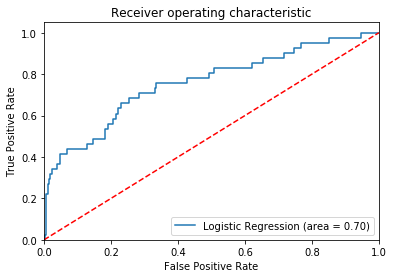

In [920]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(dt_test_target, dt_test_predict)
fpr, tpr, thresholds = roc_curve(dt_test_target, lr.predict_proba(dt_test_features)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [921]:
    print(logit_roc_auc)

0.7018320782286165


#### Logistic Regression Using Cross Validation

Let's try a 5 fold cross validation within logistic regression and see if the performance changes

In [922]:
    from sklearn.linear_model import LogisticRegressionCV

In [923]:
     lrcv = LogisticRegressionCV(Cs=[0.1], cv=10, random_state=0).fit(dt_train_features, dt_train_target.values.ravel())
     print(lrcv)

LogisticRegressionCV(Cs=[0.1], class_weight=None, cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)


In [924]:
    dt_train_predict_lrcv = lrcv.predict(dt_train_features)
    
    print(confusion_matrix(dt_train_target, dt_train_predict_lrcv))
    
    print('Accuracy score: ', accuracy_score(dt_train_target, dt_train_predict_lrcv))

[[3163 1132]
 [ 794 3501]]
Accuracy score:  0.7757857974388824


In [925]:
    print(classification_report(dt_train_target, dt_train_predict_lrcv))

             precision    recall  f1-score   support

          0       0.80      0.74      0.77      4295
          1       0.76      0.82      0.78      4295

avg / total       0.78      0.78      0.78      8590



In [926]:
    dt_test_predict_lrcv = lrcv.predict(dt_test_features)
    
    cmcv = confusion_matrix(dt_test_target, dt_test_predict_lrcv)
    
    print(cmcv)

[[782 303]
 [ 13  28]]


### Random Forest Classifier

In [927]:
    rfc = RandomForestClassifier()
    rfc.fit(dt_train_features, dt_train_target.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [928]:
    rfc.score(dt_train_features, dt_train_target)

0.9990686845168801

In [929]:
    rfc.score(dt_test_features, dt_test_target)

0.9547069271758437

#### Train Set

In [930]:
    dt_train_predict_rfc = rfc.predict(dt_train_features)
    
    confusion_matrix(dt_train_target, dt_train_predict_rfc)

array([[4295,    0],
       [   8, 4287]], dtype=int64)

In [931]:
    #see target distribution of train predictions
    np.unique(dt_train_predict_rfc, return_counts=True)

(array([0, 1], dtype=int64), array([4303, 4287], dtype=int64))

In [932]:
    print('Accuracy score: ', accuracy_score(dt_train_target, dt_train_predict_rfc))

Accuracy score:  0.9990686845168801


In [933]:
    print(classification_report(dt_train_target, dt_train_predict_rfc))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      4295
          1       1.00      1.00      1.00      4295

avg / total       1.00      1.00      1.00      8590



#### Test Set 

In [934]:
    dt_test_predict_rfc = rfc.predict(dt_test_features)
    
    confusion_matrix(dt_test_target, dt_test_predict_rfc)

array([[1071,   14],
       [  37,    4]], dtype=int64)

In [935]:
    #see target distribution of test predictions
    np.unique(dt_test_predict_rfc, return_counts=True)

(array([0, 1], dtype=int64), array([1108,   18], dtype=int64))

In [936]:
    print('Accuracy score: ', accuracy_score(dt_test_target, dt_test_predict_rfc))

Accuracy score:  0.9547069271758437


In [937]:
    print(classification_report(dt_test_target, dt_test_predict_rfc))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98      1085
          1       0.22      0.10      0.14        41

avg / total       0.94      0.95      0.95      1126



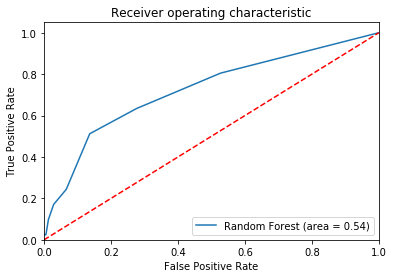

In [938]:
    logit_roc_auc = roc_auc_score(dt_test_target, dt_test_predict_rfc)
    fpr, tpr, thresholds = roc_curve(dt_test_target, rfc.predict_proba(dt_test_features)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

In [939]:
    print(logit_roc_auc)

0.5423288749016523


### Linear Support Vector Machines 

In [940]:
    from sklearn.svm import LinearSVC 
    lsvc = LinearSVC()

In [941]:
    lsvc.fit(dt_train_features, dt_train_target.values.ravel())

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [942]:
    dt_train_predict_lsvc = lsvc.predict(dt_train_features)
    print("LSVC Accuracy :", accuracy_score(dt_train_target, dt_train_predict_lsvc))

LSVC Accuracy : 0.7756693830034924


In [943]:
    confusion_matrix(dt_train_target, dt_train_predict_lsvc)

array([[3116, 1179],
       [ 748, 3547]], dtype=int64)

In [1038]:
    print(classification_report(dt_train_target, dt_train_predict_lsvc))

             precision    recall  f1-score   support

          0       0.81      0.73      0.76      4295
          1       0.75      0.83      0.79      4295

avg / total       0.78      0.78      0.78      8590



In [944]:
    dt_test_predict_lsvc = lsvc.predict(dt_test_features)
    
    confusion_matrix(dt_test_target, dt_test_predict_lsvc)

array([[776, 309],
       [ 13,  28]], dtype=int64)

In [945]:
    print('Accuracy score: ', accuracy_score(dt_test_target, dt_test_predict_lsvc))

Accuracy score:  0.7140319715808171


In [946]:
    print(classification_report(dt_test_target, dt_test_predict_lsvc))

             precision    recall  f1-score   support

          0       0.98      0.72      0.83      1085
          1       0.08      0.68      0.15        41

avg / total       0.95      0.71      0.80      1126



In [1040]:
    logit_roc_auc = roc_auc_score(dt_test_target, dt_test_predict_lsvc)
    print(logit_roc_auc)

0.6990671012700911


### Xgboost

In [1029]:
    import xgboost as xgb
    
    #Train the XGboost Model for Classification
    
    param = {}
    param['eval_metric'] = 'auc'
    param['objective'] = 'binary:logistic'    
    param['booster'] = 'gblinear'  
    param['subsample'] = 0.8 #don't use all of the training data to avoid overfitting
    #param['scale_pos_weight']=1/2 # ratio of negative to positive targets -- results are very sensitive to this parameter
    param['n_estimators']=100
    param['learning_rate']= 0.2
    param['max_depth']= 5
    param['min_child_weight']= 3
        
    modelxgb = xgb.XGBClassifier(**param)

    train_modelxgb = modelxgb.fit(dt_train_features, dt_train_target.values.ravel())

In [1030]:
    import warnings
    warnings.filterwarnings("ignore")
    
    dt_train_predict_xgb = train_modelxgb.predict(dt_train_features)

In [1031]:
    dt_train_predict_xgb.view()

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [1032]:
    confusion_matrix(dt_train_target, dt_train_predict_xgb)

array([[3075, 1220],
       [ 905, 3390]], dtype=int64)

In [1033]:
    print("XGB Accuracy :", accuracy_score(dt_train_target, dt_train_predict_xgb))

XGB Accuracy : 0.7526193247962747


In [1034]:
    print(classification_report(dt_train_target, dt_train_predict_xgb))

             precision    recall  f1-score   support

          0       0.77      0.72      0.74      4295
          1       0.74      0.79      0.76      4295

avg / total       0.75      0.75      0.75      8590



In [1035]:
    dt_test_predict_xgb = train_modelxgb.predict(dt_test_features)
    
    confusion_matrix(dt_test_target, dt_test_predict_xgb)

array([[770, 315],
       [ 13,  28]], dtype=int64)

In [1036]:
    print('Accuracy score: ', accuracy_score(dt_test_target, dt_test_predict_xgb))

Accuracy score:  0.7087033747779752


In [1037]:
    cm_xgb=classification_report(dt_test_target, dt_test_predict_xgb)
    print(cm_xgb)

             precision    recall  f1-score   support

          0       0.98      0.71      0.82      1085
          1       0.08      0.68      0.15        41

avg / total       0.95      0.71      0.80      1126



In [1041]:
    logit_roc_auc = roc_auc_score(dt_test_target, dt_test_predict_xgb)
    print(logit_roc_auc)

0.6963021243115658
